In [1]:
#Load dataset dari Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d mohammadasimbluemoon/aptos2019-diabetic-retinopathy-oversampled-256x256
!ls

Saving kaggle.json to kaggle.json
 99% 453M/460M [00:03<00:00, 169MB/s]
100% 460M/460M [00:03<00:00, 137MB/s]
aptos2019-diabetic-retinopathy-oversampled-256x256.zip	sample_data
kaggle.json


# Preprocessing Data

In [2]:
!unzip /content/aptos2019-diabetic-retinopathy-oversampled-256x256.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/4/118.png          
  inflating: test/4/19.png           
  inflating: test/4/20.png           
  inflating: test/4/21.png           
  inflating: test/4/22.png           
  inflating: test/4/23.png           
  inflating: test/4/24.png           
  inflating: test/4/25.png           
  inflating: test/4/26.png           
  inflating: test/4/27.png           
  inflating: test/4/28.png           
  inflating: test/4/29.png           
  inflating: test/4/30.png           
  inflating: test/4/31.png           
  inflating: test/4/32.png           
  inflating: test/4/33.png           
  inflating: test/4/34.png           
  inflating: test/4/35.png           
  inflating: test/4/36.png           
  inflating: test/4/37.png           
  inflating: test/4/38.png           
  inflating: test/4/39.png           
  inflating: test/4/40.png           
  inflating: test/4/41.png           
  inflating: test/4/42.png           

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [4]:
test=os.listdir('/content/test')
test0=os.listdir('/content/test/0')
test1=os.listdir('/content/test/1')
test2=os.listdir('/content/test/2')
test3=os.listdir('/content/test/3')
test4=os.listdir('/content/test/4')

print("Test Folder: ",len(test))
print("Test 0: ",len(test0))
print("Test 1: ",len(test1))
print("Test 2",len(test2))
print("Test 3",len(test3))
print("Test 4",len(test4))


Test Folder:  5
Test 0:  100
Test 1:  100
Test 2 100
Test 3 100
Test 4 100


In [5]:
train=os.listdir('/content/train')
train0=os.listdir('/content/train/0')
train1=os.listdir('/content/train/1')
train2=os.listdir('/content/train/2')
train3=os.listdir('/content/train/3')
train4=os.listdir('/content/train/4')

print("Train Folder: ",len(train))
print("Train 0: ",len(train0))
print("Train 1: ",len(train1))
print("Train 2",len(train2))
print("Train 3",len(train3))
print("Train 4",len(train4))

Train Folder:  5
Train 0:  1099
Train 1:  1000
Train 2 899
Train 3 930
Train 4 990


In [6]:
!mkdir citra

In [7]:
!mkdir /content/citra/NoDR
!mkdir /content/citra/Mild
!mkdir /content/citra/Moderate
!mkdir /content/citra/Severe
!mkdir /content/citra/ProliferativeDR

In [8]:
#train move
import shutil
import os

source_dir = '/content/train/0'
target_dir = '/content/citra/NoDR'
source_dir1 = '/content/train/1'
target_dir1 = '/content/citra/Mild'
source_dir2 = '/content/train/2'
target_dir2 = '/content/citra/Moderate'
source_dir3 = '/content/train/3'
target_dir3 = '/content/citra/Severe'
source_dir4 = '/content/train/4'
target_dir4 = '/content/citra/ProliferativeDR'
    
file_names = os.listdir(source_dir)
file_names1 = os.listdir(source_dir1)
file_names2 = os.listdir(source_dir2)
file_names3 = os.listdir(source_dir3)
file_names4 = os.listdir(source_dir4)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

for file_names1 in file_names1:
    shutil.move(os.path.join(source_dir1, file_names1), target_dir1)

for file_names2 in file_names2:
    shutil.move(os.path.join(source_dir2, file_names2), target_dir2)

for file_names3 in file_names3:
    shutil.move(os.path.join(source_dir3, file_names3), target_dir3)

for file_names4 in file_names4:
    shutil.move(os.path.join(source_dir4, file_names4), target_dir4)

In [9]:
# !mkdir citra_baru

In [10]:
# !mkdir /content/citra_baru/NoDR
# !mkdir /content/citra_baru/Mild
# !mkdir /content/citra_baru/Moderate
# !mkdir /content/citra_baru/Severe
# !mkdir /content/citra_baru/ProliferativeDR

In [11]:
# import os
# import numpy as np
# import shutil
# import pandas as pd


# def train_test_split():
#     print("########### Train Test Val Script started ###########")
#     #data_csv = pd.read_csv("DataSet_Final.csv") ##Use if you have classes saved in any .csv file

#     root_dir = '/content/citra_baru'
#     classes_dir = ['NoDR', 'Mild', 'Moderate', 'Severe','ProliferativeDR']


#     processed_dir = '/content/citra'

#     val_ratio = 0.20
#     test_ratio = 0.10

#     for cls in classes_dir:
#         # Creating partitions of the data after shuffeling
#         print("$$$$$$$ Class Name " + cls + " $$$$$$$")
#         src = processed_dir +"/" + cls  # Folder to copy images from

#         allFileNames = os.listdir(src)
#         np.random.shuffle(allFileNames)
#         train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                                   [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
#                                                                    int(len(allFileNames) * (1 - test_ratio)),
#                                                                    ])

#         train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
#         val_FileNames = [src + '/' + name for name in val_FileNames.tolist()]
#         test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

#         print('Total images: '+ str(len(allFileNames)))
#         print('Training: '+ str(len(train_FileNames)))
#         print('Validation: '+  str(len(val_FileNames)))
#         print('Testing: '+ str(len(test_FileNames)))

#         # # Creating Train / Val / Test folders (One time use)
#         os.makedirs(root_dir + '/train/' + cls)
#         os.makedirs(root_dir + '/val/' + cls)
#         os.makedirs(root_dir + '/test/' + cls)

#         # Copy-pasting images
#         for name in train_FileNames:
#             shutil.copy(name, root_dir + '/train/' + cls)

#         for name in val_FileNames:
#             shutil.copy(name, root_dir + '/val/' + cls)

#         for name in test_FileNames:
#             shutil.copy(name, root_dir + '/test/' + cls)

#     print("########### Train Test Val Script Ended ###########")

# train_test_split()

In [12]:
# os.rename("/content/test/0","/content/test/NoDR")
# os.rename("/content/test/1","/content/test/Mild")
# os.rename("/content/test/2","/content/test/Moderate")
# os.rename("/content/test/3","/content/test/Severe")
# os.rename("/content/test/4","/content/test/ProliferativeDR")

# os.rename("/content/train/0","/content/train/NoDR")
# os.rename("/content/train/1","/content/train/Mild")
# os.rename("/content/train/2","/content/train/Moderate")
# os.rename("/content/train/3","/content/train/Severe")
# os.rename("/content/train/4","/content/train/ProliferativeDR")


In [9]:
import shutil, os
shutil.rmtree(r'/content/train')
shutil.rmtree(r'/content/test')
os.remove('/content/aptos2019-diabetic-retinopathy-oversampled-256x256.zip')

In [14]:
# TRAIN_DIR = '/content/citra_baru/train/'
# VAL_DIR = '/content/citra_baru/val/'
# TEST_DIR = '/content/citra_baru/test/'

In [15]:
# labels = ['NoDR', 'Mild', 'Moderate', 'Severe','ProliferativeDR']

In [16]:
# !rmdir /content/citra_baru/NoDR
# !rmdir /content/citra_baru/Mild
# !rmdir /content/citra_baru/Moderate
# !rmdir /content/citra_baru/Severe
# !rmdir /content/citra_baru/ProliferativeDR

In [10]:
image_dir = Path('/content/citra')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [11]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

,Filepath,Label
0,/content/citra/Severe/173 - Copy.png,Severe
1,/content/citra/Severe/248 - Copy (5).png,Severe
2,/content/citra/Severe/234 - Copy (5).png,Severe


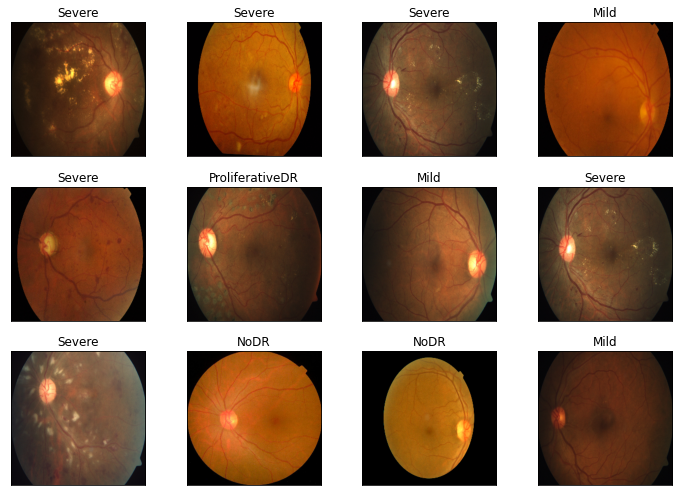

In [12]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

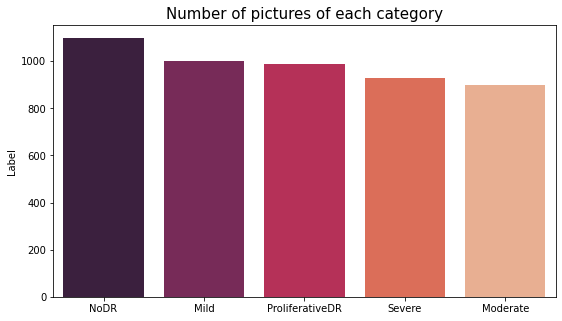

In [13]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [17]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [20]:
datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                  preprocessing_function=preprocess_input,
                                  validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                             preprocessing_function=preprocess_input)
                                   
train_data = datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=10,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

valid_data = datagen.flow_from_dataframe(dataframe=train_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=10,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='validation',
                                         )
test_data = val_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=10,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3541 validated image filenames belonging to 5 classes.
Found 885 validated image filenames belonging to 5 classes.
Found 492 validated image filenames belonging to 5 classes.


# Efficient Net B7

In [21]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 3.0 MB/s 


In [22]:
import efficientnet.tfkeras as ef

In [23]:
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.93 and logs.get('val_acc') > 0.93):
      print("\nStopped! Akurasi Train Validasi sudah mencapai 93%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [24]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
model = ef.EfficientNetB7(weights = 'imagenet', 
                          include_top = False, 
                          input_shape = (224, 224, 3),
                          pooling='avg')

inputs = model.input

# x = Flatten()
# x = Dropout(0.5)

x = Dense(64, activation='relu')(model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['acc'])

258449408/258434480 [==============================] - 4s 0us/step


In [25]:
history=model.fit(train_data,
                  validation_data=valid_data,
                  steps_per_epoch=train_data.n/10,
                  validation_steps=valid_data.n/10,
                  epochs=30,
                  callbacks=[stop],verbose=1)

Epoch 1/30
354/354 [==============================] - 557s 1s/step - loss: 1.1174 - acc: 0.5374 - val_loss: 0.8068 - val_acc: 0.6768
Epoch 2/30
354/354 [==============================] - 479s 1s/step - loss: 0.7743 - acc: 0.6987 - val_loss: 0.4251 - val_acc: 0.8497
Epoch 3/30
354/354 [==============================] - 478s 1s/step - loss: 0.5916 - acc: 0.7755 - val_loss: 0.3501 - val_acc: 0.8802
Epoch 4/30
354/354 [==============================] - 478s 1s/step - loss: 0.4681 - acc: 0.8280 - val_loss: 0.2304 - val_acc: 0.9164
Epoch 5/30
354/354 [==============================] - 478s 1s/step - loss: 0.3718 - acc: 0.8676 - val_loss: 0.1935 - val_acc: 0.9266
Epoch 6/30
354/354 [==============================] - 478s 1s/step - loss: 0.3434 - acc: 0.8817 - val_loss: 0.1872 - val_acc: 0.9424
Epoch 7/30
354/354 [==============================] - 476s 1s/step - loss: 0.2945 - acc: 0.8941 - val_loss: 0.1798 - val_acc: 0.9311
Epoch 8/30
354/354 [==============================] - 475s 1s/step - 

# Plotting Model

In [26]:
import matplotlib.pyplot as plt

In [27]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

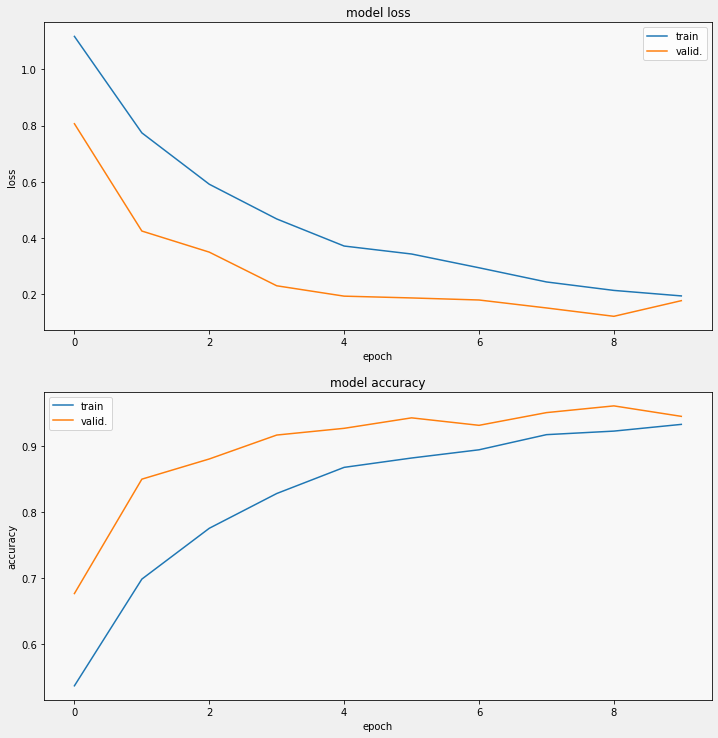

In [28]:
#display
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

# Evaluation & Prediction

In [30]:
# Predict the label of the test_images
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Mild', 'Moderate', 'NoDR', 'Moderate', 'Mild']


In [31]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

           Mild       0.73      0.99      0.84        84
       Moderate       0.98      0.52      0.68       104
           NoDR       0.98      1.00      0.99       100
ProliferativeDR       0.93      0.95      0.94       121
         Severe       0.86      1.00      0.92        83

       accuracy                           0.88       492
      macro avg       0.89      0.89      0.87       492
   weighted avg       0.90      0.88      0.87       492



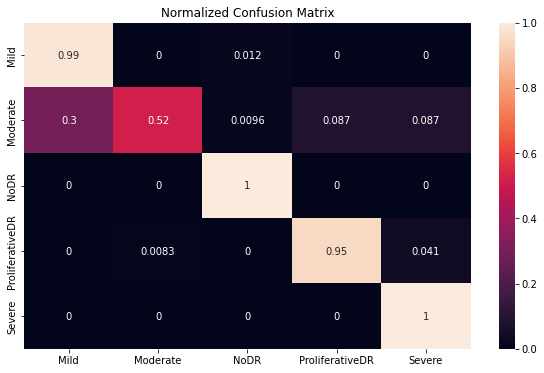

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy = 0.88


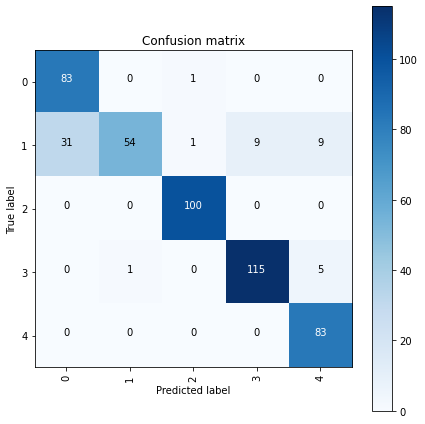

In [35]:
import itertools
from itertools import chain
from sklearn.metrics import accuracy_score, confusion_matrix

for x_model in [{'name':'EfficientNetB7','history':history,'model':model},]:
    # validate on val set
    accuracy = accuracy_score(y_test, pred)
    print('Test Accuracy = %.2f' % accuracy)

    confusion_mtx = confusion_matrix(y_test, pred) 
    cm = plot_confusion_matrix(confusion_mtx, classes = labels, normalize=False)

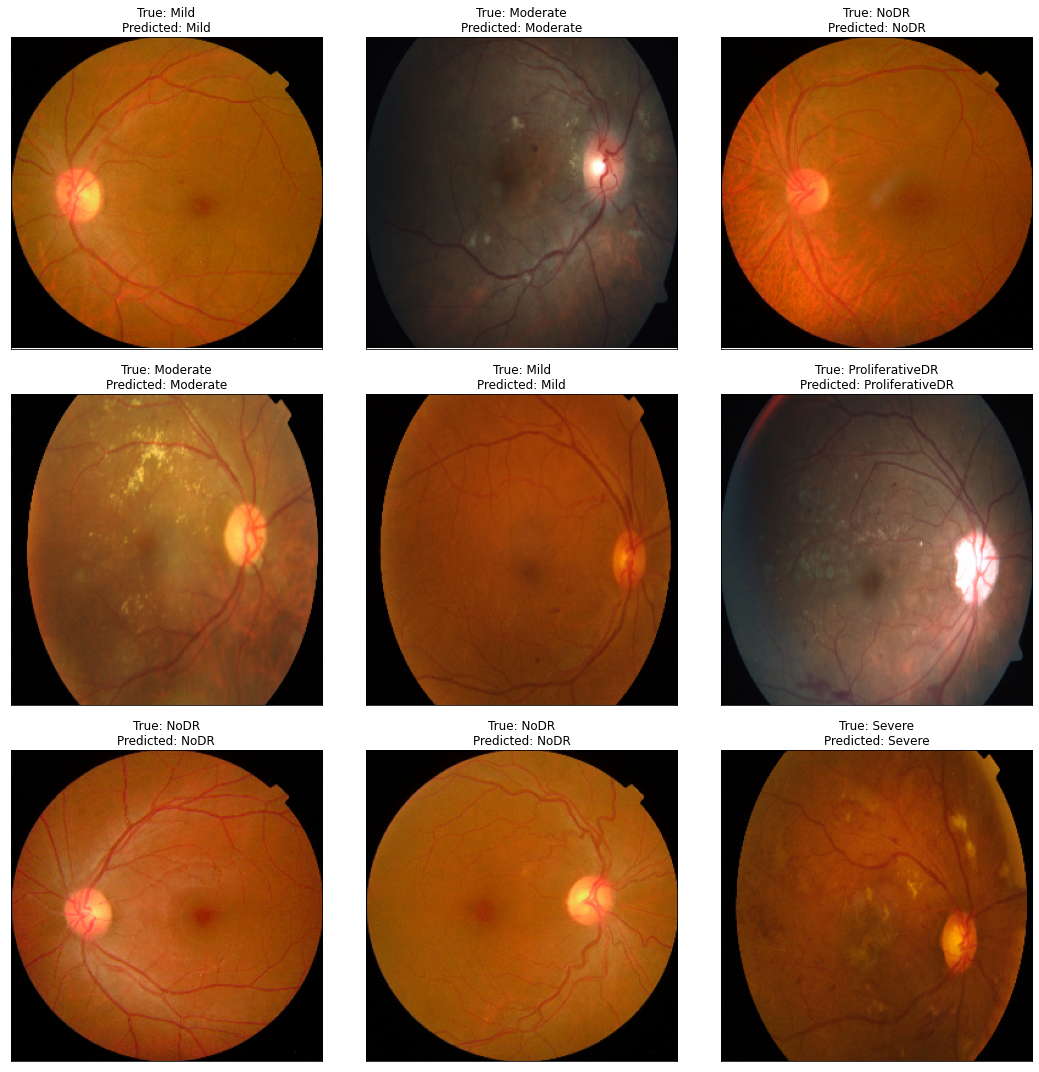

In [39]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [45]:
model.save('efficientnetb7.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
